In [36]:
import scanpy as sc
import numpy as np
adata = sc.read("../../data/predictions/adamson_pred_sclambda_2.h5ad")

In [2]:
test_rows = ~np.all(np.isnan(adata.layers["pred_sclambda"]), axis=1)
actual = adata.X.toarray()[test_rows]
pred = adata.layers["pred_sclambda"][test_rows]
print(actual[0])
print(pred[0])
# think about what control modifications happened

[0.        0.        0.        ... 5.026973  0.830568  4.2972693]
[0.32793325 0.49830228 0.07671577 ... 4.96046352 0.8708635  4.27768755]


In [3]:
# compute per-gene pearson correlation
correlations = np.array([
    np.corrcoef(actual[i, :], pred[i, :])[0, 1]
    for i in range(actual.shape[0])
])
print(correlations)

[0.89653088 0.9165243  0.82573819 ... 0.87623471 0.91284668 0.91597388]


Mean correlation across cells: 0.9075605389425168


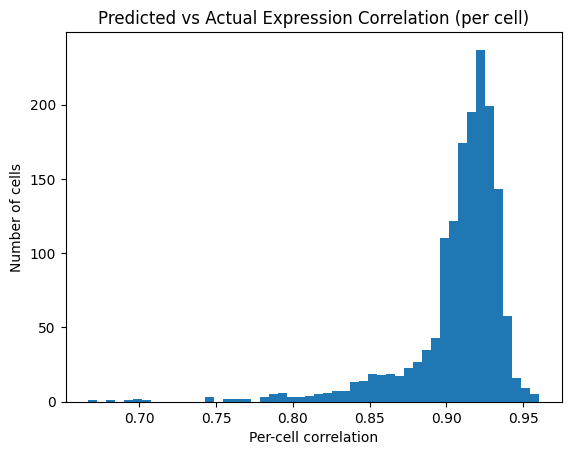

In [4]:
print("Mean correlation across cells:", np.nanmean(correlations))

# optional: histogram
import matplotlib.pyplot as plt
plt.hist(correlations, bins=50)
plt.xlabel("Per-cell correlation")
plt.ylabel("Number of cells")
plt.title("Predicted vs Actual Expression Correlation (per cell)")
plt.show()

In [38]:
mask_not_test = adata.obs["split"].isin(["train", "val"])
adata_not_test = adata[mask_not_test]
mean_gene_expression = adata_not_test.X.mean(axis=0)
print(mean_gene_expression)

[[0.3655836  0.5059202  0.07009104 ... 4.9629183  0.84876364 4.285834  ]]


In [39]:
n_cells, n_genes = adata.n_obs, adata.n_vars
adata.layers["pred_baseline_mean"] = np.full((n_cells, n_genes), np.nan, dtype=float)
mask_test = adata.obs["split"] == "test"
adata.layers["pred_baseline_mean"][mask_test] = mean_gene_expression

In [40]:
adata.layers["pred_baseline_mean"]

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.3655836 , 0.50592017, 0.07009104, ..., 4.96291828, 0.84876364,
        4.28583384],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])